In [ ]:
"""
Author: Mitch Constable & A.V. Ronquillo
Date: May 17, 2024

Purpose: To create bounding boxes using resnet50 on dataset
of animal images.

Note: The author generated this text in part with GPT-4,
OpenAI’s large-scale language-generation model. Upon generating
draft code, the author reviewed, edited, and revised the code
to their own liking and takes ultimate responsibility for
the content of this code.

"""

# Module: Introduction
This module uses the Faster R-CNN model with a ResNet-50 backbone pre-trained on the COCO dataset to perform object detection on a set of 100 deer images, and then it saves these images with bounding boxes drawn around the detected objects based on a confidence threshold.

# Module: Importing Essential Libraries
These lines import necessary modules. `torch` is the main PyTorch library. The `fastercnn_resnet50_fpn` function loads the model architecture used for object detection. Image operations are handled by `PIL` and `torchvision` torchvision, while `glob` helps in file navigation, and `matplotlib` is used for plotting.

In [ ]:
import os
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#Module: Set up the Object Detection Model & Image Directory
The script loads a pre-trained Faster R-CNN model and sets it to evaluation mode, disabling certain operations like Dropout. Furthermore, after preparing the `F.to_tensor`, it sets up the transformation to convert images to PyTorch tensors. Then, the image directory path can be set using `file_path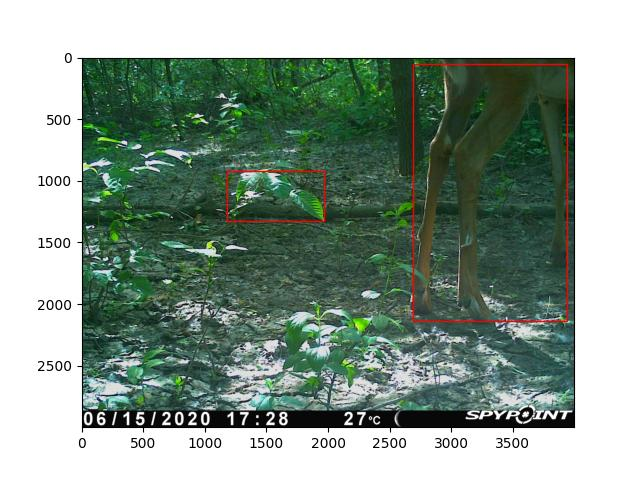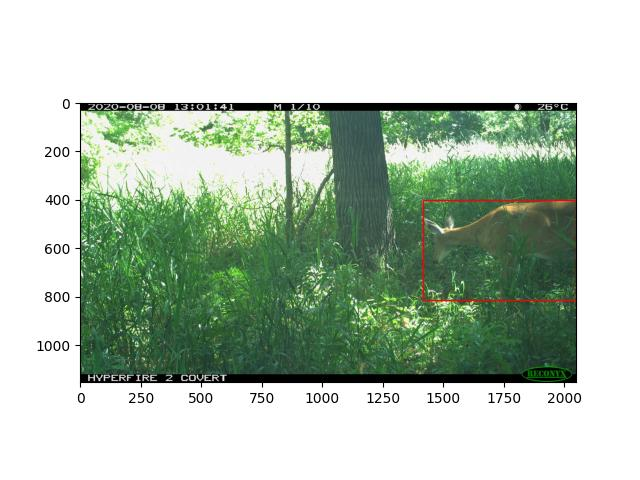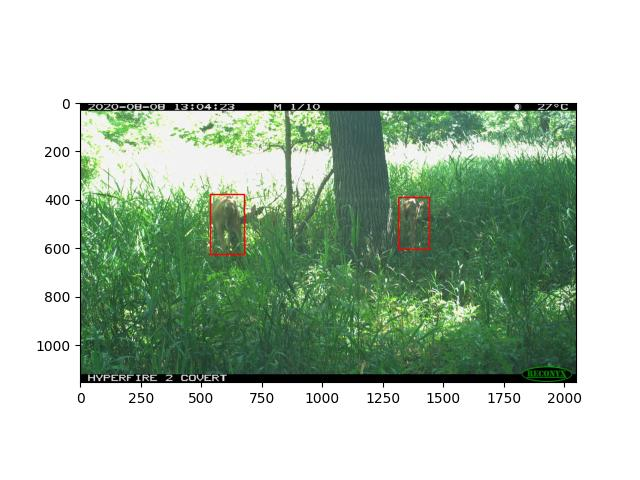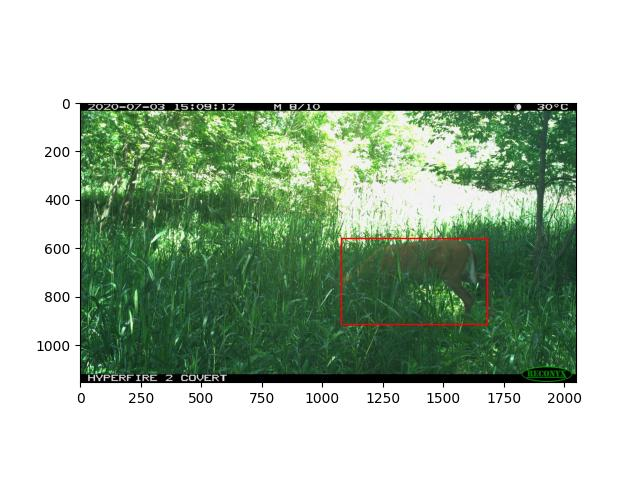` to access the location of the animals images in the Google Drive for eventual analysis.

In [ ]:
# Load the pretrained model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model = model.eval()

# Prepare the image transform
transform = F.to_tensor

# Set your image directory path
from google.colab import drive
drive.mount('/content/drive')
# File path on Google Drive
file_path = '/content/drive/My Drive/shared-data/Notebook datafiles/deer_100'

# Module: Threshold Detection Confidence
The `confidence_threshold`is set to 0.5 for detection confidence. Only detections with a confidence score greater than or equal to 0.5 will be considered valid. In this case, 0.5 is the minimum score that detected objects must achieve to be considered valid detections. This score, typically between 0 and 1, represents the model's confidence in the accuracy of its prediction for each object it detects in an image. Detections below this confidence level are not processed further or displayed.

In [ ]:
# Set a threshold for detection confidence
confidence_threshold = 0.5

# Module: Processing the Deer Images
By using a `for` loop, the script iterates through each `.jpg` file in the specified directory, then the current image file opens and converts it to the RGB color space through the `Image.open(image_path).convert('RGB')` statement, allowing the images to be processed. The `image_tensor` applies a transformation to the image. This transformation could involve resizing, normalization, or other preprocessing steps required by the model.

In [ ]:
for image_path in glob.glob(f'{image_dir}/*.jpg'):
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image)

# Module: Predicting using the Model without Gradient Calculation
This context manager disables gradient computation using `torch.no_grad()` during the model's prediction. This is common practice during inference (prediction) to save computational resources like using less memory and speeds up the computation, then passing the tensor through the model. By making a `prediction`, the `model([image_tensor])` script uses the pre-trained model to make a prediction on the current image tensor. The model's output is stores in the prediction variable.

In [ ]:
with torch.no_grad():
    prediction = model([image_tensor])

# Module: Extracting Prediction Data
This moudle retrieves the detection results composed of the bounding box coordinates, detection confidence scores, and the categories' labels. The `boxes` extracts the bounding boxes of the detected objects from the model's prediction. The `scores` extracts the confidence scores associated with each detected object, while the `labels` extracts the object classes corresponding to each detected object.

In [ ]:
    boxes = prediction[0]['boxes']
    scores = prediction[0]['scores']
    labels = prediction[0]['labels']

# Module: Plotting the Image for Visualization
This module creates a plot for the image. A new figure and an axes object is created for displaying the image with detected objects.
This `ax.imshow(image)` displays the current image on the axes object.

In [ ]:
    fig, ax = plt.subplots(1)
    ax.imshow(image)

# Module: Filter by Confidence Score & Extract Bounding Boxes Coordinates
This module iterates over each detection using the `for` loop statement. It checks if its score exceeds the threshold, prints the details, and plots a rectangle over the image if it does exceed the value threshold. The `boxes`, `scores`, and `labels` are zipped together so that elements from each list (all related to a single detection) are processed in unison within each iteration of the loop.

A list of coordinates is unpacked for the bounding boxes identifying detected objects. Each element is a set of coordinates `x, y, xmax, ymax = box` indicating the rectangular regions of the image where objects are detected. The (x, y) is of the upper-left corner and (xmax, ymax) of the lower-right corner of the rectangle.

The `if score` conditional statement checks if the object's confidence score is greater than or equal to the specified threshold. If the score meets the threshold, the `(f'Image: {image_path}, Label: {label.item()}, Score: {score.item()}')` line prints information about the detected object, including the image path, label, and score.

In [ ]:
    for box, score, label in zip(boxes, scores, labels):
        if score > confidence_threshold:
            # Code to print details and draw rectangles
            print(f'Image: {image_path}, Label: {label.item()}, Score: {score.item()}')
            x, y, xmax, ymax = box

# Module: Drawing the Rectangle Patch
This code creates a rectangle patch (from matplotlib.patches) to visually represent the bounding box. This is executed by using the extracted coordinates. The rectangle has a red border and no fill colour. In this manner, `ax.add_patch(rect)` adds the rectangle object to the current axes object.

By executing this loop, the script annotates each image in the dataset with red bounding boxes around detected objects considered reliably detected based on the confidence threshold, with associated information printed about each detection. This visual output is useful for verifying and demonstrating the performance of the object detection model.

In [ ]:
            rect = patches.Rectangle((x, y), (xmax - x), (ymax - y), linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

# Module: Saving the Annotated Images
This module constructs a `save_path` by prefixing the original `image_name` with the 'annotated_' prefix, it then saves the plot and image with the bounding box to this path location, and closes the plot to free up memory.

Overall, this Python script is useful for applying an object detector to a set of images and visualizing the results.

In [ ]:
    # Save the image with bounding boxes in the same folder
    image_name = os.path.basename(image_path)
    save_path = os.path.join(image_dir, f'annotated_{image_name}')
    # Save with 'annotated_' prefix
    plt.savefig(save_path)
    plt.close()

After running the script in its entirety, it will take several minutes for the images to be annotated. The newly annotated images with the bounding boxes can be found in the original 'deer_100' folder from which the data set came from in the directory.

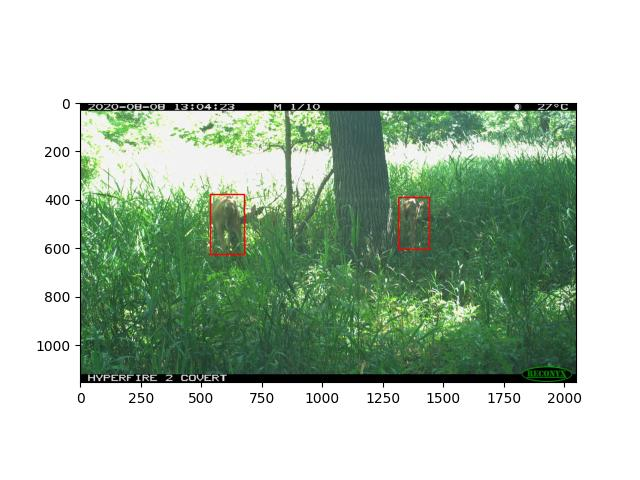